# MSDS 422 Assignment 7: Cats vs Dogs

**This assignment follows the same structure as Assignment 6. We will employ at least a 2x2 completely crossed experimental design. We will again use a simple training-and-test regimen. The factors in the design may include numbers of layers and/or nodes within layers, types of layers (convolutional or pooling), and/or other hyperparameters. You will utilize convolutional neural networks (CNNs) within Python TensorFlow.** 

**This week, you will compete in the Dogs vs. Cats kernels Edition Kaggle.com competition, https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition (Links to an external site.). .  (Links to an external site.)Specifically, you will build models using the training set to forecast the test set. The images are in .jpg format, so you will need to research how to handle that.  You are required to submit no fewer than four models for evaluation by Kaggle.com, and you must provide your Kaggle.com scores and user ID for validation.**

## 1) Data preparation, exploration, visualization

In [1]:
# Importing a bunch of libraries

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from datetime import datetime
import os
import random
import gc
import cv2


In [2]:
train_dogs = ['train/{}'.format(i) for i in os.listdir('train') if 'dog' in i]  #get dog images
train_cats = ['train/{}'.format(i) for i in os.listdir('train') if 'cat' in i]  #get cat images

In [3]:
df_test = ['test/{}'.format(i) for i in os.listdir('test')] #get test images

In [4]:
df_train = train_dogs[:2000] + train_cats[:2000]

In [5]:
random.shuffle(df_train)  # shuffle it randomly

In [6]:
#Clear list that are useless

del train_dogs
del train_cats

gc.collect()   #collect garbage to save memory

115

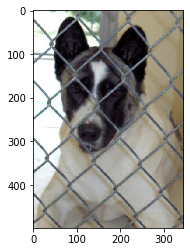

In [29]:
plt.imshow(mpimg.imread(df_train[0]))
        

In [22]:
mysize = 64 #image size
channels = 3 # color images

In [24]:
X = [] # images
y = [] # labels

for pic in df_train:
        X.append(cv2.resize(cv2.imread(pic, cv2.IMREAD_COLOR), (mysize , mysize), interpolation=cv2.INTER_CUBIC))
        y.append(1) if 'dog' in pic else y.append(0)

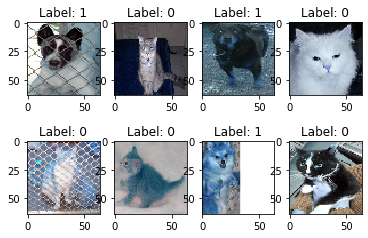

In [28]:
fig, axis = plt.subplots(2, 4)

for i, ax in enumerate(axis.flat):
    ax.imshow(X[i])
    ax.set(title = f'Label: {y[i]}')

In [30]:
del df_train
gc.collect()

14540

In [59]:
X_test = []

for pic in df_test:
        X_test.append(cv2.resize(cv2.imread(pic, cv2.IMREAD_COLOR), (mysize , mysize), interpolation=cv2.INTER_CUBIC))

In [60]:
del df_test
gc.collect()

3206

In [31]:
#Convert list to numpy array
X = np.array(X)
y = np.array(y)

Text(0.5, 1.0, 'Labels for Cats and Dogs')

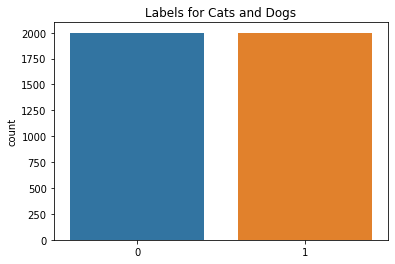

In [32]:
sns.countplot(y)
plt.title('Labels for Cats and Dogs')

In [33]:
X.shape

(4000, 64, 64, 3)

In [35]:
y.shape

(4000,)

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [37]:
#clear memory

del X
del y
gc.collect()

46

In [38]:
mybatch = 16 #batch size

In [41]:
import tensorflow as tf
from tensorflow import keras

In [46]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Conv2D(32, (3, 3), activation='relu',input_shape=(mysize, mysize, channels)))
model1.add(keras.layers.MaxPooling2D((2, 2)))
model1.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(keras.layers.MaxPooling2D((2, 2)))
model1.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(keras.layers.MaxPooling2D((2, 2)))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dropout(0.5))  #Dropout for regularization
model1.add(keras.layers.Dense(256, activation='relu'))
model1.add(keras.layers.Dense(1, activation='sigmoid')) 

In [47]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)             

In [50]:
model1.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [51]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, 
                                                             rotation_range=20, 
                                                             zoom_range=0.1, 
                                                             width_shift_range=0.1, 
                                                             height_shift_range=0.1, 
                                                             shear_range=0.1,
                                                             horizontal_flip=True,
                                                             fill_mode="nearest")

In [52]:
val_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [53]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=mybatch)

val_generator = val_datagen.flow(X_val, y_val, batch_size=mybatch)

In [54]:
ntrain = len(X_train)
nval = len(X_val)

In [55]:
m1_start = datetime.now()

history = model1.fit_generator(train_generator,
                              steps_per_epoch=ntrain // mybatch,
                              epochs=64,
                              validation_data=val_generator,
                              validation_steps=nval // mybatch)

m1_end = datetime.now()

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/64
200/200 [==============================] - 16s 81ms/step - loss: 0.6926 - acc: 0.5172 - val_loss: 0.6842 - val_acc: 0.5412
Epoch 2/64
200/200 [==============================] - 16s 79ms/step - loss: 0.6818 - acc: 0.5597 - val_loss: 0.6679 - val_acc: 0.6037
Epoch 3/64
200/200 [==============================] - 17s 84ms/step - loss: 0.6671 - acc: 0.5984 - val_loss: 0.7728 - val_acc: 0.4975
Epoch 4/64
200/200 [==============================] - 18s 90ms/step - loss: 0.6462 - acc: 0.6306 - val_loss: 0.7613 - val_acc: 0.5337
Epoch 5/64
200/200 [==============================] - 19s 93ms/step - loss: 0.6308 - acc: 0.6478 - val_loss: 0.6233 - val_acc: 0.6500
Epoch 6/64
200/200 [==============================] - 19s 94ms/step - loss: 0.6217 - acc: 0.6575 - val_loss: 0.5993 - val_acc: 0.6525
Epoch 7/64
200/200 [==============================] - 20s 99ms/step - loss: 0.6126 - acc: 0.6716 - val_loss: 0.6889 - va

Epoch 60/64
200/200 [==============================] - 19s 94ms/step - loss: 0.4099 - acc: 0.8163 - val_loss: 0.4376 - val_acc: 0.7937
Epoch 61/64
200/200 [==============================] - 19s 94ms/step - loss: 0.4161 - acc: 0.8078 - val_loss: 0.4224 - val_acc: 0.8012
Epoch 62/64
200/200 [==============================] - 19s 93ms/step - loss: 0.4112 - acc: 0.8078 - val_loss: 0.4730 - val_acc: 0.7650
Epoch 63/64
200/200 [==============================] - 18s 92ms/step - loss: 0.4081 - acc: 0.8125 - val_loss: 0.4212 - val_acc: 0.8037
Epoch 64/64
200/200 [==============================] - 18s 91ms/step - loss: 0.4049 - acc: 0.8234 - val_loss: 0.4303 - val_acc: 0.8037


In [56]:
m1_time = round((m1_end - m1_start).total_seconds(), 2)

print(f'Time to fit: {m1_time}s')

Time to fit: 1235.49s


<function matplotlib.pyplot.show(*args, **kw)>

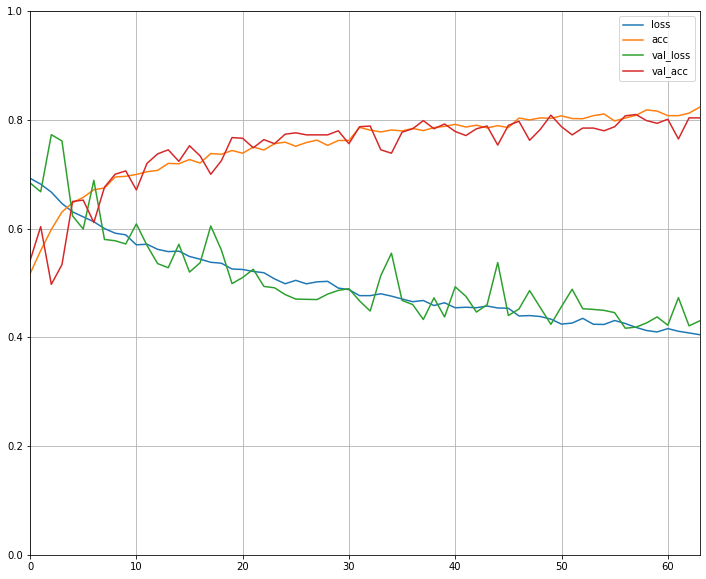

In [57]:
pd.DataFrame(history.history).plot(figsize=(12, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show

In [58]:
#Save the model
model1.save_weights('model1_weights.h5')
model1.save('model1_keras.h5')

In [177]:
x_test = np.array(X_test)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255) 

In [178]:
test_generator = test_datagen.flow(x_test, batch_size=1, shuffle=False)

In [179]:
columns = 5

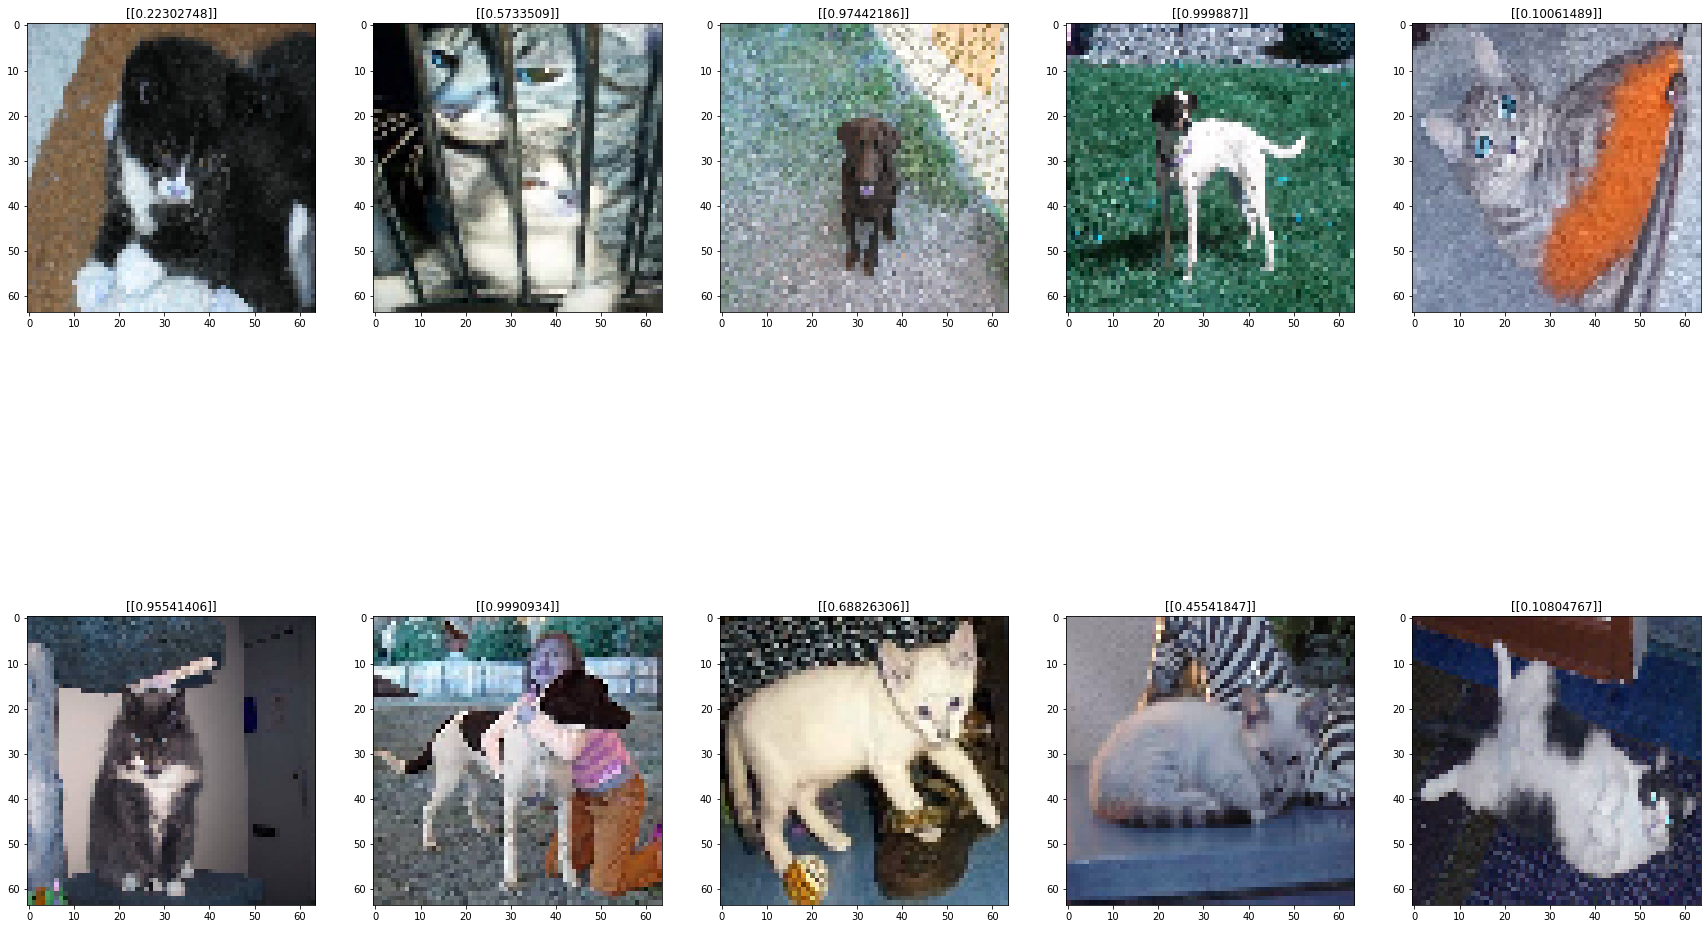

In [180]:
i = 0
plt.figure(figsize=(30,20))
for batch in test_generator:
    pred = model1.predict(batch)
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.title(f'{pred}')
    imgplot = plt.imshow(batch[0])
    i += 1
    if i % 10 == 0:
        break
plt.show()

In [142]:
predictions1 = model1.predict(test_generator)

In [143]:
predictions1[:5]

array([[0.22302748],
       [0.5733509 ],
       [0.97442186],
       [0.999887  ],
       [0.10061489]], dtype=float32)

In [144]:
predict1 = pd.DataFrame(predictions1)

In [145]:
predict1[:5]

,0
0,0.223027
1,0.573351
2,0.974422
3,0.999887
4,0.100615


In [133]:
submission1 = pd.read_csv('sample_submission.csv')

In [134]:
submission1['label'] = predict1

In [135]:
submission1.head()

,id,label
0,1,0.223027
1,2,0.573351
2,3,0.974422
3,4,0.999887
4,5,0.100615


In [136]:
submission1.to_csv(r'submission1.csv', index=False)